In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import nltk
import re

nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/content/IMDB Dataset.csv')


Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.67      0.68       783
    positive       0.65      0.68      0.66       717

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.67      1500



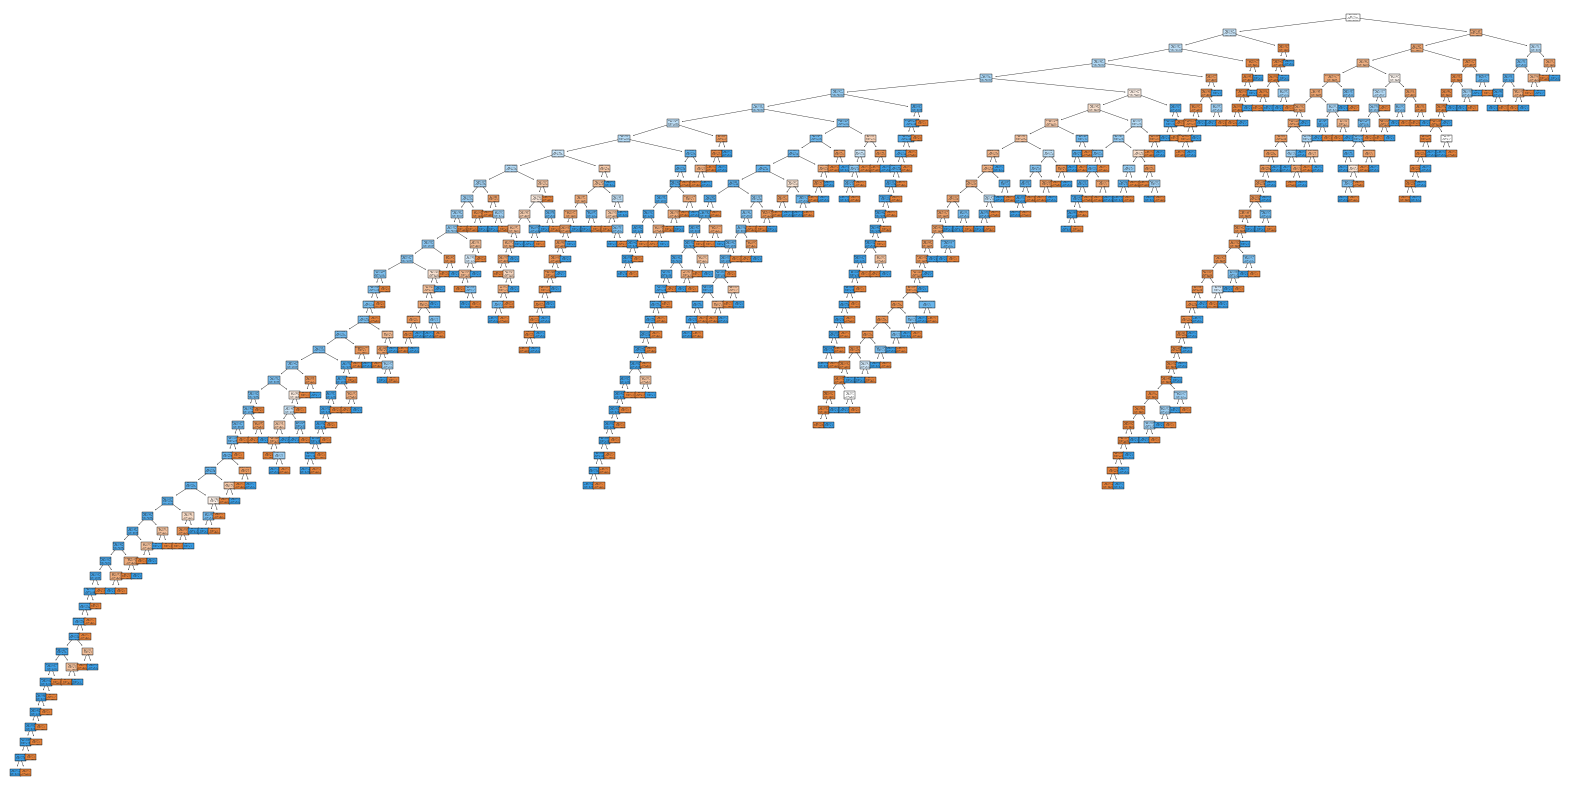


SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.85      0.76       783
    positive       0.78      0.58      0.67       717

    accuracy                           0.72      1500
   macro avg       0.74      0.72      0.71      1500
weighted avg       0.73      0.72      0.72      1500



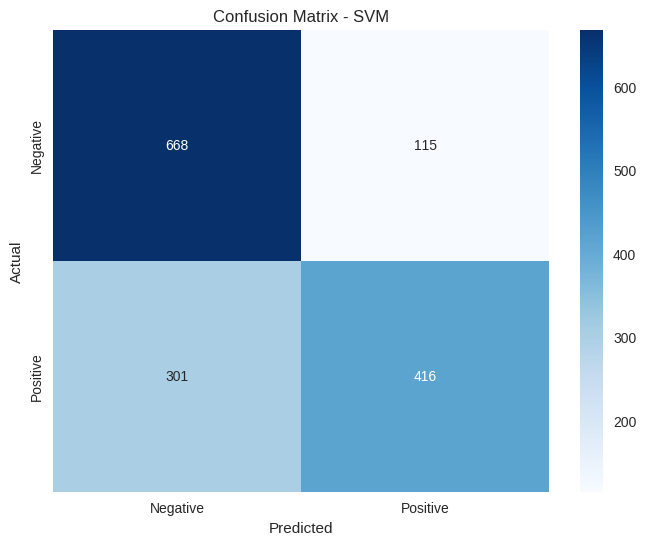

Epoch 1/15
350/350 [==============================] - 5s 5ms/step - loss: 0.6333 - accuracy: 0.6480
Epoch 2/15
350/350 [==============================] - 1s 4ms/step - loss: 0.3017 - accuracy: 0.9397
Epoch 3/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9929
Epoch 4/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0276 - accuracy: 0.9983
Epoch 5/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 0.9989
Epoch 6/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 7/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.9994
Epoch 8/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 0.9994
Epoch 9/15
350/350 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 10/15
350/350 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.9994

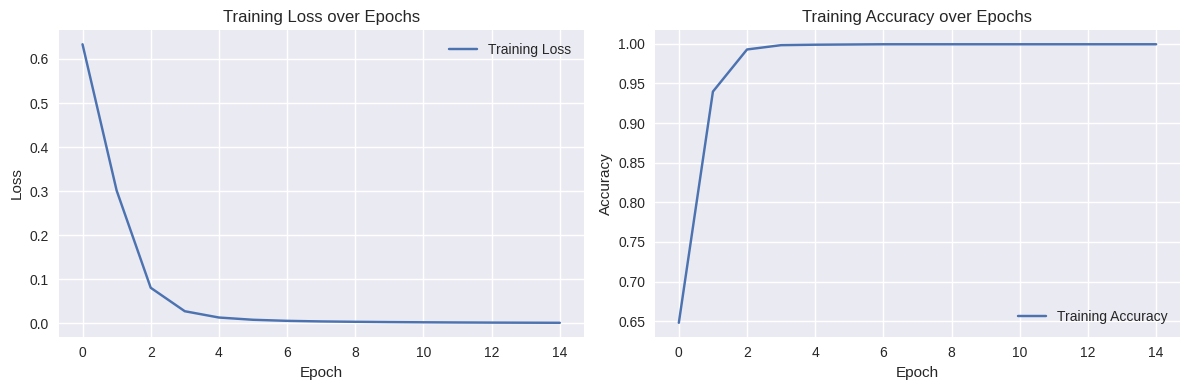

XGBoost Classification Report               precision    recall  f1-score   support

           0       0.81      0.58      0.67       783
           1       0.65      0.85      0.74       717

    accuracy                           0.71      1500
   macro avg       0.73      0.71      0.71      1500
weighted avg       0.73      0.71      0.70      1500



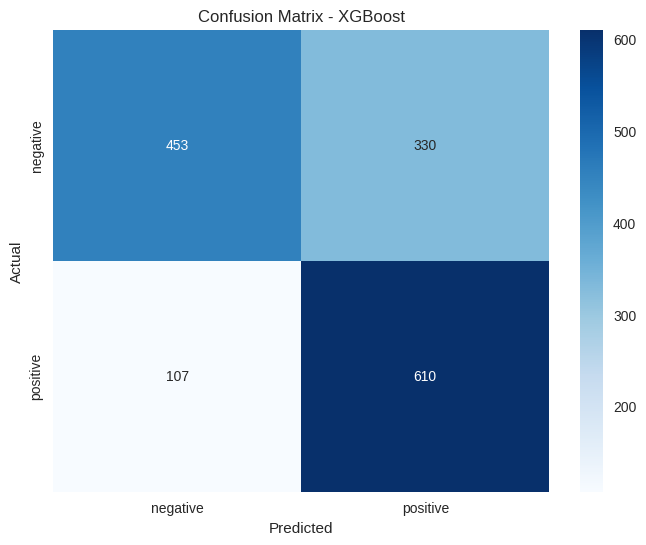

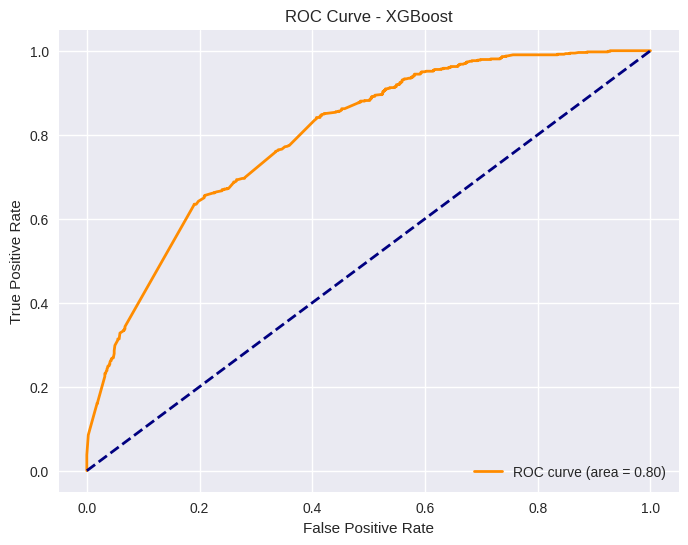

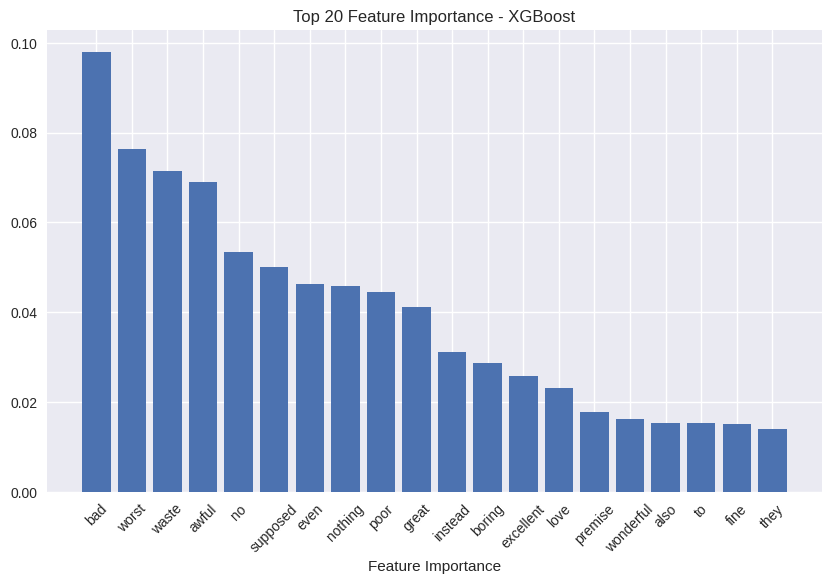


Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.79      0.76       783
    positive       0.75      0.69      0.72       717

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500



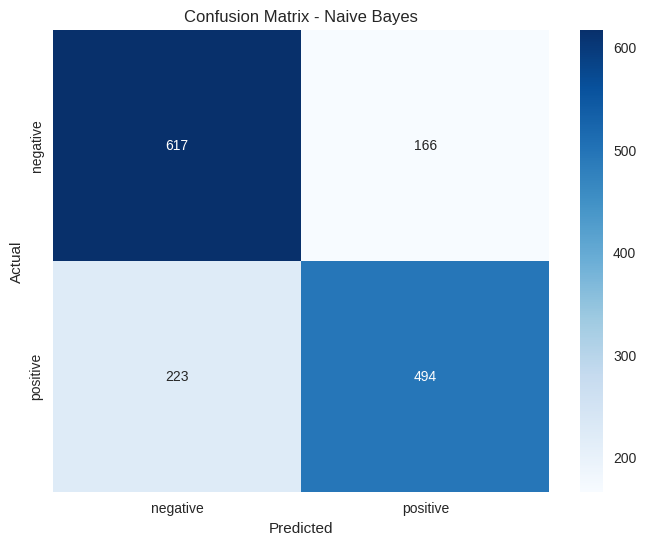

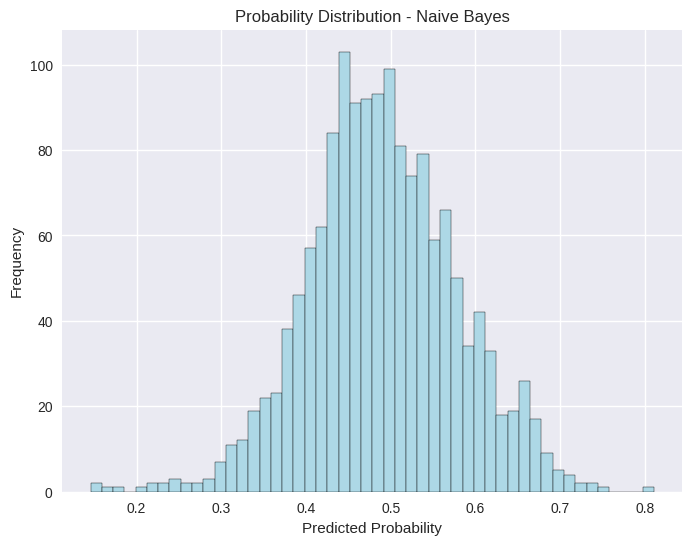

In [3]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score

df=df[:5000]
df.isna().sum()
df[df['review'].str.isspace()]
df[df['review'].apply(lambda x: x=='')]
CLR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
    cleantext = re.sub(CLR, '', raw_html)
    return cleantext

df['review'] = df['review'].apply(lambda x: cleanhtml(x))

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

df['review'].head(10).apply(text_process)
X = df['review']
Y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])
# print(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)






#Decisiontree
x_dec=x_train
x_dect=x_test
y_dec=y_train
y_dect=y_test

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(x_dec, y_dec)

# Make predictions on the test set
predictions = dt_model.predict(x_dect)

# Evaluate the performance of the model
dt_accuracy = accuracy_score(y_dect, predictions)

# Display classification report
print('\nDecision Tree Classification Report:\n', classification_report(y_dect, predictions))
dt_precision = precision_score(y_test, predictions, average='weighted')
dt_f1 = f1_score(y_test, predictions, average='weighted')



plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=vect.get_feature_names_out(), class_names=['Negative', 'Positive'])
plt.show()





#SVM
tfidf_vectorizer = TfidfVectorizer()
X_train_svm = list(map(str, x_train))
X_train_svm = tfidf_vectorizer.fit_transform(X_train_svm)
X_test_svm = list(map(str, x_test))
X_test_svm = tfidf_vectorizer.transform(X_test_svm)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train)
predictions = svm_model.predict(X_test_svm)
svm_accuracy = accuracy_score(y_test, predictions)
print('\nSVM Classification Report:\n', classification_report(y_test, predictions))

svm_precision = precision_score(y_test, predictions, average='weighted')
svm_f1 = f1_score(y_test, predictions, average='weighted')

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#Neural Networks

x_nn_train = x_train
y_nn_train = y_train
x_nn_test = x_test
y_nn_test = y_test

x_nn_train = x_nn_train.toarray()
x_nn_test = x_nn_test.toarray()

label_encoder = LabelEncoder()
y_nn_train = label_encoder.fit_transform(y_nn_train)
y_nn_train = y_nn_train.astype(int)
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=x_nn_train.shape[1]))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_nn_train, y_nn_train, batch_size=10, epochs=15)
model.summary()

y_nn_test = label_encoder.fit_transform(y_nn_test)

x_nn_test = x_nn_test.reshape(x_nn_test.shape[0], -1)
test_loss, test_acc = model.evaluate(x_nn_test, y_nn_test)
print('Neural Networks Test loss:', test_loss)
print('Neural Networks Test accuracy:', test_acc)

nn_precision = precision_score(y_test, predictions, average='weighted')
nn_f1 = f1_score(y_test, predictions, average='weighted')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


# XGBoost
vectorizer = TfidfVectorizer()
data_features = vectorizer.fit_transform(df['review'])
data_features = data_features.toarray()

x_xg_train, x_xg_test, y_xg_train, y_xg_test = train_test_split(data_features, df['sentiment'], test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
y_encoded_test = label_encoder.fit_transform(y_xg_test)

y_encoded_train= label_encoder.fit_transform(y_xg_train)

xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.01)
xgb_model.fit(x_xg_train, y_encoded_train)

predictions = xgb_model.predict(x_xg_test)




xg_accuracy = roc_auc_score(y_xg_test, predictions)
print('XGBoost Classification Report',classification_report(y_encoded_test, predictions))


cm = confusion_matrix(y_encoded_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_encoded_test, xgb_model.predict_proba(x_xg_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

feature_importance = xgb_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

sorted_idx = feature_importance.argsort()[::-1][:20]  # Top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(20), feature_importance[sorted_idx], align='center')
plt.xticks(range(20), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance - XGBoost')
plt.show()



# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nv_train=x_train
nv_test=x_test
ynv_train=y_train
ynv_test=y_test
vectorizer = TfidfVectorizer()
nv_train=list(map(str, nv_train))
nv_train = vectorizer.fit_transform(nv_train)

nv_test=list(map(str, nv_test))

nv_test = vectorizer.transform(nv_test)


nv_model = MultinomialNB()


nv_model.fit(nv_train, ynv_train)


predictions = nv_model.predict(nv_test)


nb_accuracy = accuracy_score(y_test, predictions)
nb_precision = precision_score(y_test, predictions, average='weighted')
nb_f1 = f1_score(y_test, predictions, average='weighted')

print('\nClassification Report:\n', classification_report(ynv_test, predictions))


cm = confusion_matrix(ynv_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

if len(label_encoder.classes_) == 2:
    probas = nv_model.predict_proba(nv_test)[:, 1]
    plt.figure(figsize=(8, 6))
    plt.hist(probas, bins=50, color='lightblue', edgecolor='black')
    plt.title('Probability Distribution - Naive Bayes')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.show()


Accuracies
Decision Tree Accuracy:  0.6726666666666666
SVM Accuracy:  0.7226666666666667
Neural Networks Accuracy:  0.862666666507721
Naive Bayes Accuracy:  0.7406666666666667
XGBoost Accuracy:  0.7146555731896953


Precision
Decision Tree Precision:  0.6734817488141884
SVM Precision:  0.7343297359383837
Naive Bayes Precision:  0.7411971861471863


F1 Score
Decision Tree F1 Score:  0.6728228633332902
SVM F1 Score:  0.7167214611872147
Naive Bayes F1 Score:  0.739853113669648


Starting entering review and enter exit to quit: 
exit


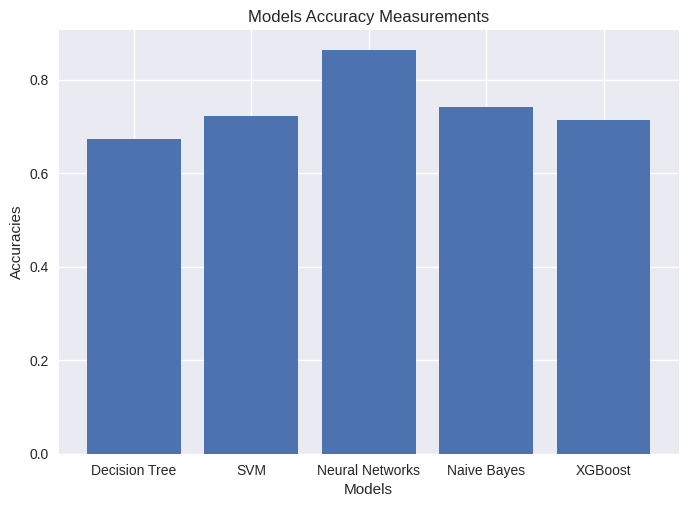

In [6]:

def predict_sentiment(model, vectorizer, text):
    # Preprocess the input
    processed_text = text_process(text)
    processed_text=str(processed_text)
    vectorized_text = vectorizer.transform([processed_text]).toarray()

    prediction=model.predict(vectorized_text)

    if (float(prediction[0])>= 0.5):
      return 'positive'
    else:
      return 'negative'

print('Accuracies')
print('Decision Tree Accuracy: ',dt_accuracy)
print('SVM Accuracy: ',svm_accuracy)
print('Neural Networks Accuracy: ', test_acc)
print('Naive Bayes Accuracy: ', nb_accuracy)
print('XGBoost Accuracy: ',xg_accuracy)

print('\n\nPrecision')
print('Decision Tree Precision: ',dt_precision)
print('SVM Precision: ',svm_precision)
print('Naive Bayes Precision: ', nb_precision)

print('\n\nF1 Score')
print('Decision Tree F1 Score: ',dt_f1)
print('SVM F1 Score: ',svm_f1)
print('Naive Bayes F1 Score: ', nb_f1)

print("\n\nStarting entering review and enter exit to quit: ")
custom_input=input()
x=["Decision Tree","SVM","Neural Networks","Naive Bayes","XGBoost"]
y=[dt_accuracy,svm_accuracy,test_acc,nb_accuracy,xg_accuracy]
plt.bar(x,y)
plt.title('Models Accuracy Measurements')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.show()
while(custom_input!='exit'):
    # prediction = predict_sentiment(model, vect, custom_input,choice)
    prediction = predict_sentiment(model, vect, custom_input)
    if(prediction != None):
      print("Predicted sentiment:", prediction)

    print("Choose 1 to enter a review and 2 to exit")
    choice = int(input())
    if choice == 2:
      break

    custom_input = input("Enter a review ")